<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Tutorial 03: Morphometrics<center>

<font size ="3"><font color='blue'>In this tutorial you will learn:
    
<font size ="3"><font color='blue'>- How to analyze morphologies and plot results

<font size ="3">There are two types of features, the neuron and neurite features.

<font size ="3">- Neurite features can be extracted from a single neurite, a list of neurites or a neuron.

<font size ="3">- Neuron features can only be extracted from a whole neuron, because some particular information is usually required (e.g. distance from soma).

In [1]:
# import the packages
import matplotlib.pyplot as plt
import neurom as nm
import numpy as np

# Define the paths in which the data file is
good_neuron = "input/example_morphologies/Fluo55_low.asc"
neuron = nm.load_morphology(good_neuron)

<font size ="3">All features can be called through the neurom.get function

In [2]:
# help(nm.features.neurite)
help(nm.features.morphology)

Help on module neurom.features.morphology in neurom.features:

NAME
    neurom.features.morphology - Morphology features.

DESCRIPTION
    Any public function from this namespace can be called via the features mechanism. If calling
    directly the function in this namespace can only accept a morphology as its input. If you want to
    apply it to a morphology population then you must use the features mechanism e.g. ``features.get``.
    The features mechanism does not allow you to apply these features to neurites.

    >>> import neurom
    >>> from neurom import features
    >>> m = neurom.load_morphology("tests/data/swc/Neuron.swc")
    >>> result = features.get('soma_surface_area', m)
    >>> population = neurom.load_morphologies("tests/data/valid_set")
    >>> result = features.get('sholl_crossings', population)

    For more details see :ref:`features`.

FUNCTIONS
    aspect_ratio(morph, neurite_type=<NeuriteType.all: 32>, projection_plane='xy')
        Calculates the min/max rat

<font size = "3">Now let's see how to obtain some measurements.

In [3]:
# Extract section_lengths
section_lengths_neuron = nm.get("section_lengths", neuron)
print("Section lengths: \n", section_lengths_neuron[:10])

# Extract the local bifurcation angles
local_bif_angles = nm.get("local_bifurcation_angles", neuron)
print("\nSection local bifurcation angles: \n", local_bif_angles[:10])

Section lengths: 
 [125.13077545166016, 124.34028625488281, 163.31492614746094, 23.143268585205078, 13.671525001525879, 5.4365153312683105, 7.427929401397705, 122.31117248535156, 223.8179168701172, 615.74267578125]

Section local bifurcation angles: 
 [1.875139019069966, 0.4293747783741623, 1.284743192501375, 0.6993977597375743, 2.837939292380174, 2.0113672381924954, 1.9660023347452151, 2.571552693915766, 1.2229657259308395, 1.81106277089467]


In [4]:
try:
    # this must create an error because no soma is available
    nm.get('soma_radius', neuron.neurites)

except nm.exceptions.NeuroMError:
    print ("Soma was not found. Input object is wrong.")


Soma was not found. Input object is wrong.


## Select Neurite Types

<font size ="3">The previous examples treated all neurites in the same way. NeuroM also allows you to extract specific morphometrics for specific types of tree. 

In [5]:
dir(nm.NeuriteType) # You can see some of these neurite types listed below (i.e. 'apical_dendrite')

['__class__',
 '__contains__',
 '__doc__',
 '__getitem__',
 '__init_subclass__',
 '__iter__',
 '__len__',
 '__members__',
 '__module__',
 '__name__',
 '__new__',
 '__qualname__',
 'all',
 'apical_dendrite',
 'axon',
 'axon_carrying_dendrite',
 'basal_dendrite',
 'custom10',
 'custom11',
 'custom12',
 'custom13',
 'custom14',
 'custom15',
 'custom16',
 'custom17',
 'custom18',
 'custom19',
 'custom5',
 'custom6',
 'custom7',
 'custom8',
 'custom9',
 'soma',
 'undefined']

In [6]:
# Extract the section lengths of axonal trees
ax_section_lengths = nm.get("section_lengths", neuron, neurite_type=nm.NeuriteType.axon)

# Extract the section lengths of basal dendrite trees
ba_section_lengths = nm.get(
    "section_lengths", neuron, neurite_type=nm.NeuriteType.basal_dendrite
)

# Extract the section lengths of apical dendrite trees
ap_section_lengths = nm.get(
    "section_lengths", neuron, neurite_type=nm.NeuriteType.apical_dendrite
)

print("axonal ", ax_section_lengths)
print("\n basal  ", ba_section_lengths)
print("\n apical ", ap_section_lengths)
print("\n total_axonal_length =", np.sum(ax_section_lengths))

axonal  [125.13077545166016, 124.34028625488281, 163.31492614746094, 23.143268585205078, 13.671525001525879, 5.4365153312683105, 7.427929401397705, 122.31117248535156, 223.8179168701172, 615.74267578125, 195.0153045654297, 7.0960187911987305, 11.986316680908203, 98.99915313720703, 36.76093673706055, 141.6623077392578, 580.3489990234375, 82.78782653808594, 15.272869110107422, 127.34693908691406, 19.79242706298828, 19.01007652282715, 168.3170623779297, 78.61100769042969, 26.14040756225586, 260.1595458984375, 36.36137390136719, 464.41302490234375, 10.992305755615234, 642.8326416015625, 121.58130645751953, 540.0194091796875, 57.40644073486328, 27.629798889160156, 12.96740436553955, 47.255680084228516, 78.45690155029297, 163.9033660888672, 420.84552001953125, 184.70970153808594, 163.84957885742188, 57.01117706298828, 49.273658752441406, 28.75994300842285, 51.456050872802734]

 basal   [41.81123352050781, 10.01152515411377, 115.59085083007812, 70.33538055419922, 144.306884765625, 52.76976013

## Let's plot the results

In [7]:
def histogram(data):
    """Generates a histogram in a new figure"""
    # create an image with one subplot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))

    # create a histogram with specified bins and normalized
    ax.hist(data, bins=10)
    ax.set_title(
        feature.replace("_", " ")
    )  # replace the underscores with spaces in the string
    ax.set_xlabel("length (um)")
    ax.set_ylabel("density")

    return f, ax


def boxplot(data):
    """Generates a boxplot in a new figure"""
    # create an image with one subplot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.boxplot(data)  
    ax.set_ylabel("length (um)")
    

    return f, ax

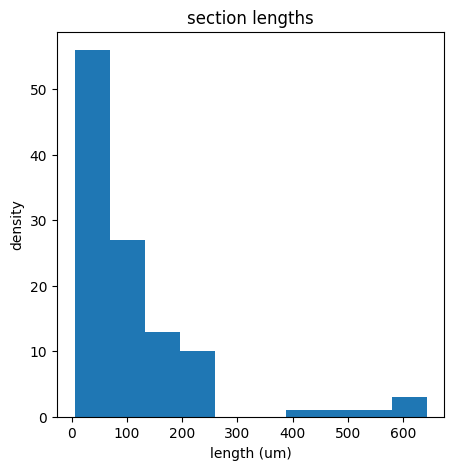

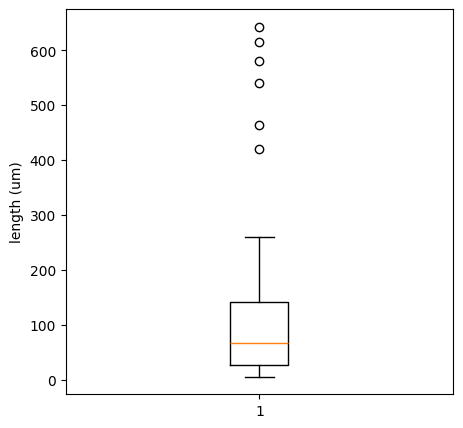

In [8]:
feature = "section_lengths"
values = nm.get(feature, neuron)

histogram(values)
boxplot(values);